# Notebook to visualise cNMF analysis on healthy and diseased small/large intestine (broad NMF)
Analysis by Simon Koplev

In [1]:
import numpy as np
import pandas as pd
import os
import scanpy as sc

import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn

In [2]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [3]:
adata_raw = sc.read_h5ad('/lustre/scratch126/cellgen/team205/sk29/megagut/cNMF_rebuttal/h5ad/pooled_healthy_disease.plus_additional_epi.18485genes.with_fineannot.nodoublets.20230322.small_largeintestine.h5ad')

In [4]:
# read obs with NMF scores
adata_raw.obs = pd.read_csv("/lustre/scratch126/cellgen/team205/sk29/megagut/cNMF_rebuttal/h5ad/pooled_healthy_disease.plus_additional_epi.18485genes.with_fineannot.nodoublets.20230322.small_largeintestine.cNMF.csv",index_col=0)

/home/jovyan/my-conda-envs/standard_plotting/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: DtypeWarning: Columns (3,5,6,8,9,11,12,14,62,63,64,65,66,67,70,73,75,82,83,84,86,92,93,95,100,101,102,105,106,108,109,111,112,113,114,115,117,119,123,124,125,126,127,128,129,130,131,132,133) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
usage = pd.read_csv('/lustre/scratch126/cellgen/team205/sk29/megagut/cNMF_rebuttal/results/cNMF_k64_usage.csv',index_col=0)

In [6]:
usage

,level_3_annot,cNMF_1,cNMF_2,cNMF_3,cNMF_4,cNMF_5,cNMF_6,cNMF_7,cNMF_8,cNMF_9,...,cNMF_55,cNMF_56,cNMF_57,cNMF_58,cNMF_59,cNMF_60,cNMF_61,cNMF_62,cNMF_63,cNMF_64
index,,,,,,,,,,,,,,,,,,,,,
AAACGGGGTCCTAGCG-HCA_A_GT12934998,Trm_CD4,0.246212,0.252285,0.000000,0.033385,0.067446,0.008916,0.017244,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.088128,0.000000,0.000000,0.000000,0.000000
AAACGGGTCAAAGTAG-HCA_A_GT12934998,Treg_IL10,0.158162,0.246037,0.000000,0.059851,0.190807,0.000000,0.040643,0.049698,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000329,0.000411,0.000000,0.000000
AACCGCGGTTCCCTTG-HCA_A_GT12934998,Monocyte,0.000000,0.044937,0.000000,0.000000,0.043042,0.015335,0.000000,0.000000,0.015074,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
AACTCTTGTCTTGTCC-HCA_A_GT12934998,Monocyte,0.000000,0.027948,0.000000,0.000000,0.023910,0.015535,0.000000,0.002060,0.007589,...,0.0,0.008434,0.0,0.000000,0.0,0.000000,0.014809,0.000000,0.011745,0.000000
AAGGTTCAGAATAGGG-HCA_A_GT12934998,NK_CD16,0.148054,0.032340,0.000000,0.000000,0.044367,0.000000,0.019959,0.135924,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTATGCTCTTGCCGT-1_16-GI4401_DUO_EPI_GEX,Enteroendocrine,0.004905,0.000000,0.000000,0.000000,0.000000,0.050691,0.014448,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.826569,0.000000,0.000000,0.000000
TTTCCTCCACGCCAGT-1_16-GI4401_DUO_EPI_GEX,Enterocyte,0.003196,0.000000,0.000000,0.000000,0.006356,0.000000,0.074210,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.002429,0.000000,0.000000,0.000000
TTTCCTCGTAGCGATG-1_16-GI4401_DUO_EPI_GEX,Enteroendocrine,0.000000,0.000000,0.074930,0.000000,0.000000,0.022095,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.034545,0.000000,0.000000,0.000089


In [7]:
adata_raw

AnnData object with n_obs × n_vars = 313879 × 18485
    obs: 'latent_cell_probability', 'latent_RT_efficiency', 'cecilia22_predH', 'cecilia22_predH_prob', 'cecilia22_predH_uncertain', 'cecilia22_predL', 'cecilia22_predL_prob', 'cecilia22_predL_uncertain', 'elmentaite21_pred', 'elmentaite21_pred_prob', 'elmentaite21_pred_uncertain', 'suo22_pred', 'suo22_pred_prob', 'suo22_pred_uncertain', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'n_counts_raw', 'log1p_n_counts_raw', 'n_genes_raw', 'log1p_n_genes_raw', 'percent_mito_raw', 'n_counts_mito_raw', 'percent_ribo_raw', 'n_counts_ribo_raw', 'percent_hb_raw', 'n_counts_hb_raw', 'percent_top50_raw', 'n_counts_spliced', 'log1p_n_counts_spliced', 'n_genes_spliced', 'log1p_n_genes_spliced', 'percent_mito_spliced', 'n_counts_mito_spliced', 'percent_ribo_spliced', 'n_counts_ribo_spliced', 'percent_hb_spliced', 'n_counts_hb_sp

In [8]:
usage = usage.drop(columns='level_3_annot')

In [9]:
usage

,cNMF_1,cNMF_2,cNMF_3,cNMF_4,cNMF_5,cNMF_6,cNMF_7,cNMF_8,cNMF_9,cNMF_10,...,cNMF_55,cNMF_56,cNMF_57,cNMF_58,cNMF_59,cNMF_60,cNMF_61,cNMF_62,cNMF_63,cNMF_64
index,,,,,,,,,,,,,,,,,,,,,
AAACGGGGTCCTAGCG-HCA_A_GT12934998,0.246212,0.252285,0.000000,0.033385,0.067446,0.008916,0.017244,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.088128,0.000000,0.000000,0.000000,0.000000
AAACGGGTCAAAGTAG-HCA_A_GT12934998,0.158162,0.246037,0.000000,0.059851,0.190807,0.000000,0.040643,0.049698,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000329,0.000411,0.000000,0.000000
AACCGCGGTTCCCTTG-HCA_A_GT12934998,0.000000,0.044937,0.000000,0.000000,0.043042,0.015335,0.000000,0.000000,0.015074,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
AACTCTTGTCTTGTCC-HCA_A_GT12934998,0.000000,0.027948,0.000000,0.000000,0.023910,0.015535,0.000000,0.002060,0.007589,0.001613,...,0.0,0.008434,0.0,0.000000,0.0,0.000000,0.014809,0.000000,0.011745,0.000000
AAGGTTCAGAATAGGG-HCA_A_GT12934998,0.148054,0.032340,0.000000,0.000000,0.044367,0.000000,0.019959,0.135924,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTATGCTCTTGCCGT-1_16-GI4401_DUO_EPI_GEX,0.004905,0.000000,0.000000,0.000000,0.000000,0.050691,0.014448,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.826569,0.000000,0.000000,0.000000
TTTCCTCCACGCCAGT-1_16-GI4401_DUO_EPI_GEX,0.003196,0.000000,0.000000,0.000000,0.006356,0.000000,0.074210,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.002429,0.000000,0.000000,0.000000
TTTCCTCGTAGCGATG-1_16-GI4401_DUO_EPI_GEX,0.000000,0.000000,0.074930,0.000000,0.000000,0.022095,0.000000,0.000000,0.000000,0.073421,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.034545,0.000000,0.000000,0.000089


         Falling back to preprocessing with `sc.pp.pca` and default params.


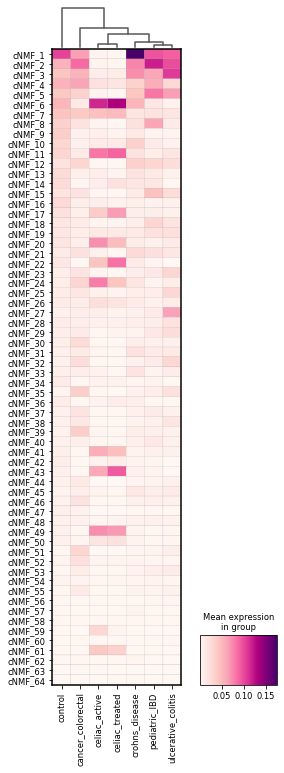

In [10]:
# Heatmap of cNMF usage by cell type
sc.set_figure_params(dpi_save=300)
#sc.pl.heatmap(
sc.pl.matrixplot(
    adata_raw,
    var_names=usage.columns,
    groupby='control_vs_disease',
    dendrogram=True,
    swap_axes=True,
    cmap="RdPu",
    figsize=(4, 12),
    save="_megagut_small_largeintestine_cNMF_usage_byDisease.pdf"
)

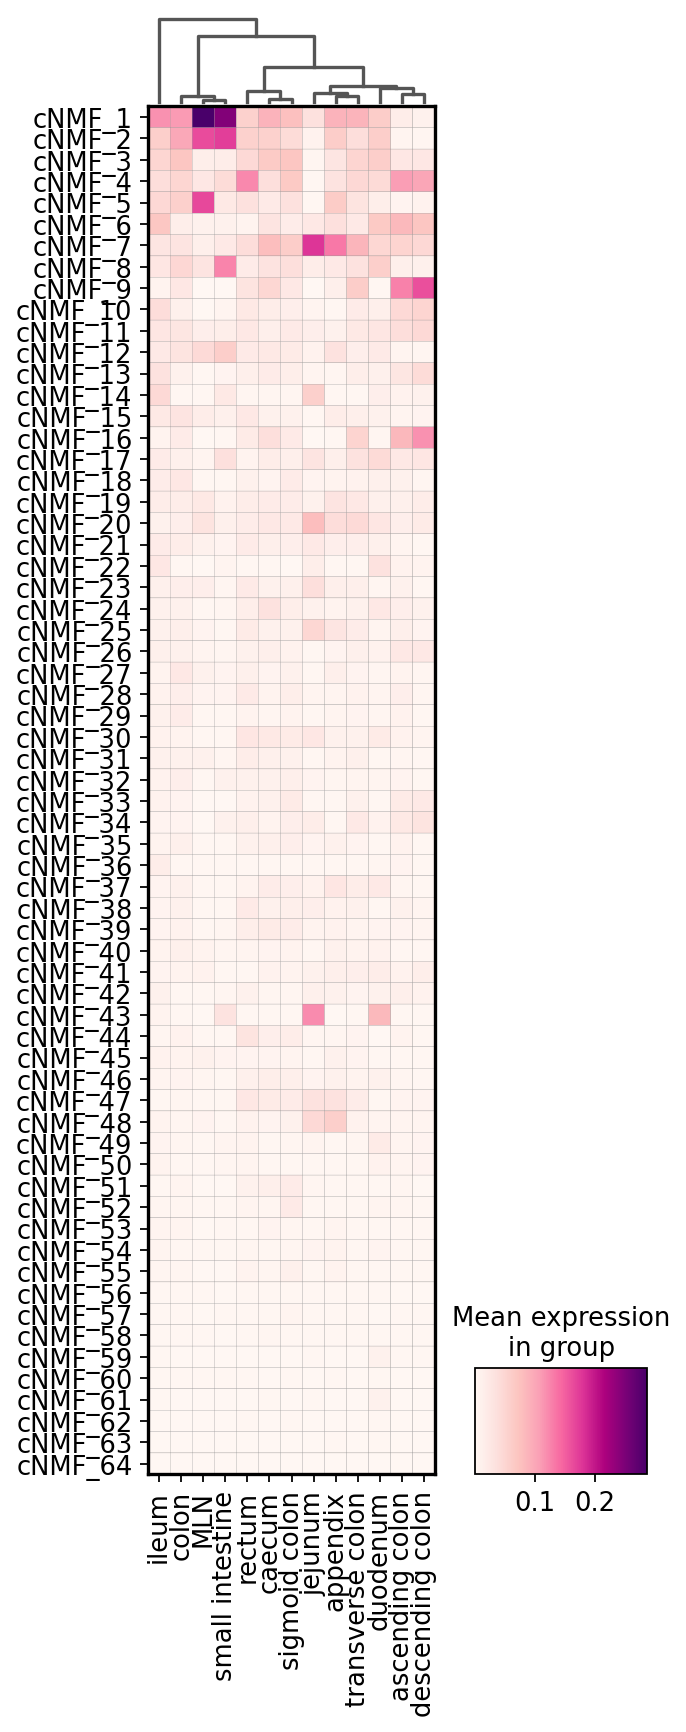

In [11]:
# Heatmap of cNMF usage by cell type
sc.set_figure_params(dpi_save=300)
#sc.pl.heatmap(
sc.pl.matrixplot(
    adata_raw,
    var_names=usage.columns,
    groupby='organ_unified',
    dendrogram=True,
    swap_axes=True,
    cmap="RdPu",
    figsize=(4, 12),
    save="_megagut_small_largeintestine_cNMF_usage_byTissue.pdf"
)

In [12]:
list(adata_raw.obs.level_3_annot.unique())

['Trm_CD4',
 'Treg_IL10',
 'Monocyte',
 'NK_CD16',
 'Trm/em_CD8',
 'Tnaive/cm_CD4',
 'Treg',
 'B_plasmablast',
 'Megakaryocyte/platelet',
 'Tnaive/cm_CD8',
 'MAIT',
 'B_naive',
 'TA',
 'Trm_CD8',
 'NK_CD56bright',
 'Trm_Th17',
 'Tfh_naive',
 'Mono/neutrophil_MPO',
 'DC_cDC2',
 'B_plasma_IgA1',
 'B_preB',
 'Macrophage',
 'B_memory',
 'ILC3',
 'gdT',
 'B_plasma_IgG',
 'Macrophage_MMP9',
 'EC_lymphatic',
 'T/NK_cycling',
 'EC_arterial_2',
 'Macrophage_CD5L',
 'EC_arterial_1',
 'DC_cDC1',
 'Tfh',
 'Oesophagus_fibroblast',
 'Macrophage_TREM2',
 'Lamina_propria_fibroblast_ADAMDEC1',
 'B_plasma_IgA2',
 'EC_capillary',
 'Vascular_smooth_muscle',
 'Macrophage_LYVE1',
 'EC_venous',
 'gdT_naive',
 'B_GC_I',
 'B_proB',
 'Mast',
 'B_plasma_IgM',
 'B_GC_II',
 'Pericyte',
 'DC_migratory',
 'Crypt_fibroblast_PI16',
 'Microfold',
 'Enterocyte',
 'Epithelial_stem',
 'Immune_recruiting_pericyte',
 'Follicular_DC',
 'Glial_3',
 'Goblet_cycling',
 'Villus_fibroblast_F3',
 'Goblet_progenitor',
 'BEST4_enter

In [13]:
column_order = [
#TNK
    'ILC3','MAIT','NK_CD16','NK_CD56bright','T/NK_cycling','Tfh',
    'Tfh_naive','Tnaive/cm_CD4','Tnaive/cm_CD8','Treg','Treg_IL10',
    'Trm/em_CD8','Trm_CD4','Trm_CD8','Trm_Th17','gdT','gdT_naive',
 #B cells
'B_GC_I',
'B_GC_II',
'B_memory',
'B_naive',
'B_plasma_IgA1',
'B_plasma_IgA2',
'B_plasma_IgG',
'B_plasma_IgM',
'B_plasmablast',
'B_preB',
'B_proB',
    #endothelial
'EC_arterial_1',
'EC_arterial_2',
'EC_capillary',
'EC_cycling',
'EC_lymphatic',
'EC_venous',    
    #mesenchymal
'Crypt_fibroblast_PI16','Fibroblast_reticular','Follicular_DC','Immune_recruiting_pericyte',
    'Lamina_propria_fibroblast_ADAMDEC1','Mesothelium','Myofibroblast','Oesophagus_fibroblast',
    'Oral_mucosa_fibroblast','Pericyte','Rectum_fibroblast','Vascular_smooth_muscle','Villus_fibroblast_F3',
    #epithelial
'BEST4_enterocyte_colonocyte','Colonocyte','DCS_MUC17','DCS_MUC17_cycling','Enterocyte',
    'Enteroendocrine','Enteroendocrine_progenitor','Epithelial_stem','Goblet','Goblet_cycling',
    'Goblet_progenitor','Mature_colonocyte','Microfold','Mucous_gland_neck','Paneth','Surface_foveolar','TA','Tuft',
    #myeloid
'DC_cDC1',
'DC_cDC2',
'DC_langerhans',
'DC_migratory',
'DC_pDC',
'Eosinophil/basophil',
'Erythrocytes',
'Macrophage',
'Macrophage_CD5L',
'Macrophage_LYVE1',
'Macrophage_MMP9',
'Macrophage_TREM2',
'Mast',
'Megakaryocyte/platelet',
'Mono/neutrophil_MPO',
'Monocyte',

    #neural
'Branch_A_interneuron',
'Branch_A_primary_afferent_neuron',
'Branch_B_excitatory_motor_neuron',
'Enteric_neural_crest_cycling',
'Glial/Enteric_neural_crest',
'Glial_1',
'Glial_2',
'Glial_3',
'Neuroblast',
]

In [14]:
adata_raw.obs['level_3_annot'].cat.reorder_categories((column_order), inplace=True)

<ipython-input-14-cbb1c1685dd2>:1: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  adata_raw.obs['level_3_annot'].cat.reorder_categories((column_order), inplace=True)


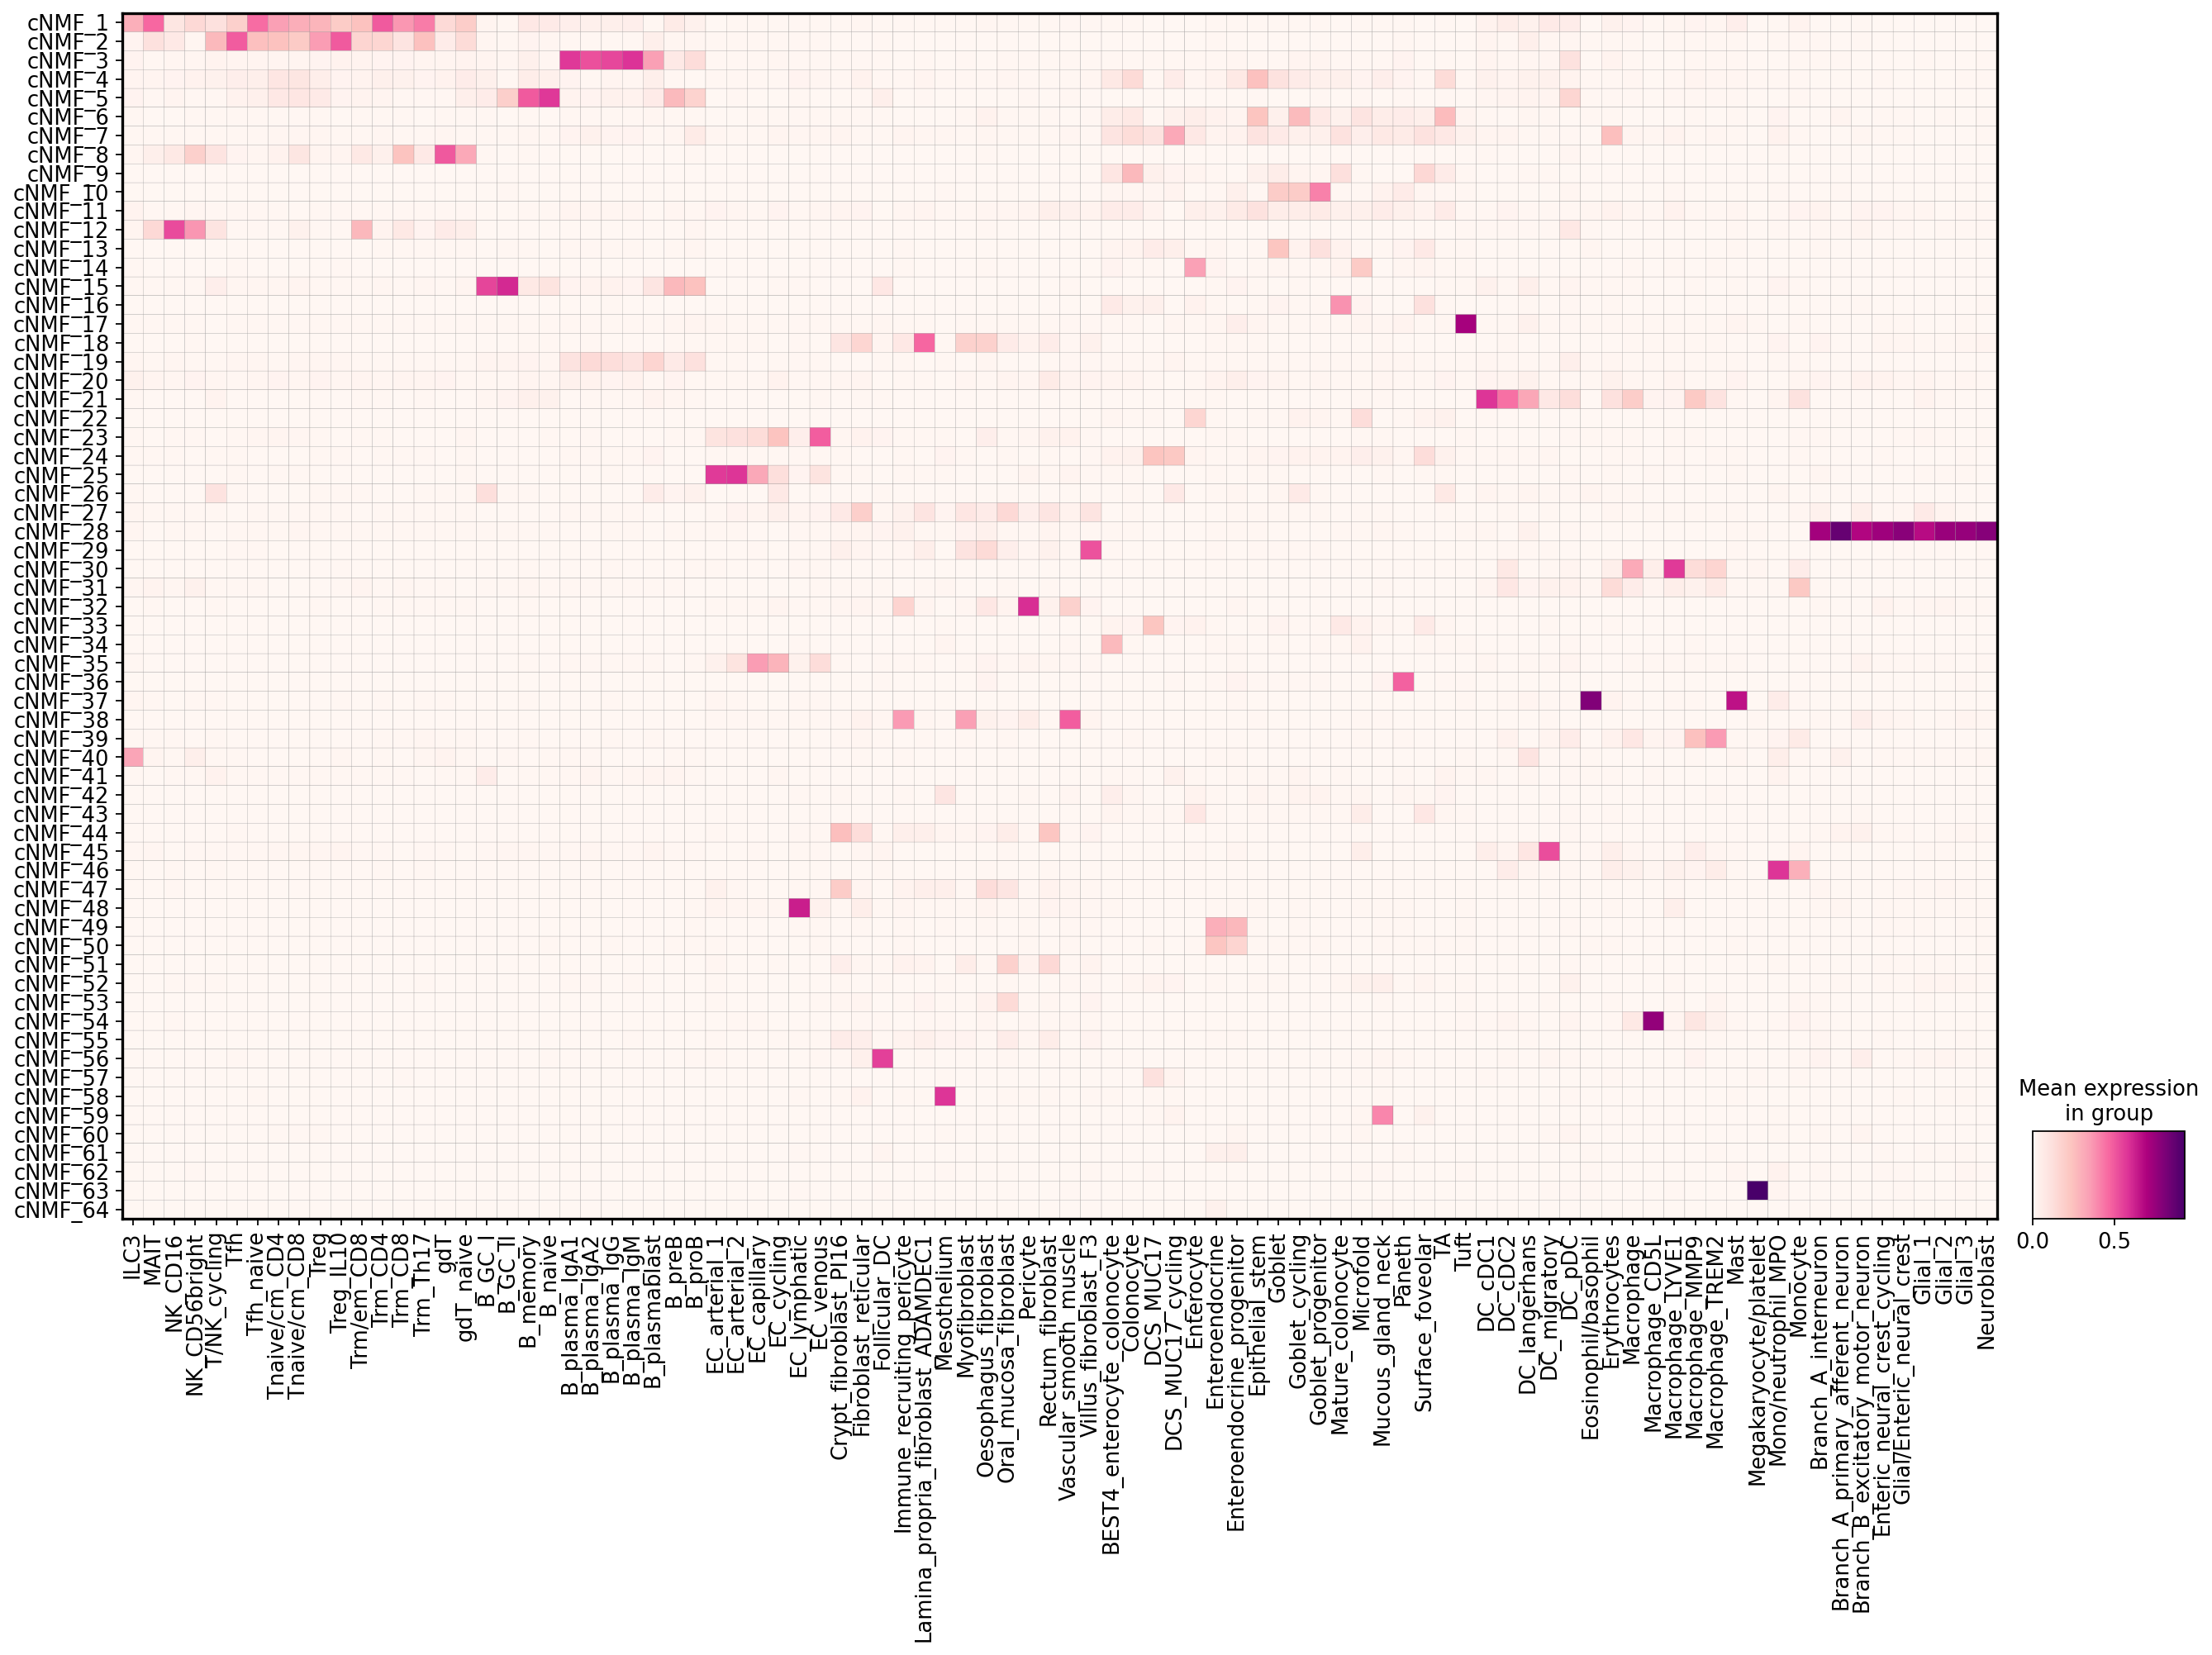

In [15]:
# Heatmap of cNMF usage by cell type
sc.set_figure_params(dpi_save=300)
#sc.pl.heatmap(
sc.pl.matrixplot(
    adata_raw,
    var_names=usage.columns,
    groupby='level_3_annot',
    dendrogram=False,
    swap_axes=True,
    cmap="RdPu",
    figsize=(20, 12),
    save="_megagut_small_largeintestine_cNMF_usage_byAnnotation.pdf"
)

In [16]:
adata_raw.obs['disease_annot'] = adata_raw.obs['level_1_annot'].astype(str) + '_' + adata_raw.obs['control_vs_disease'].astype(str)

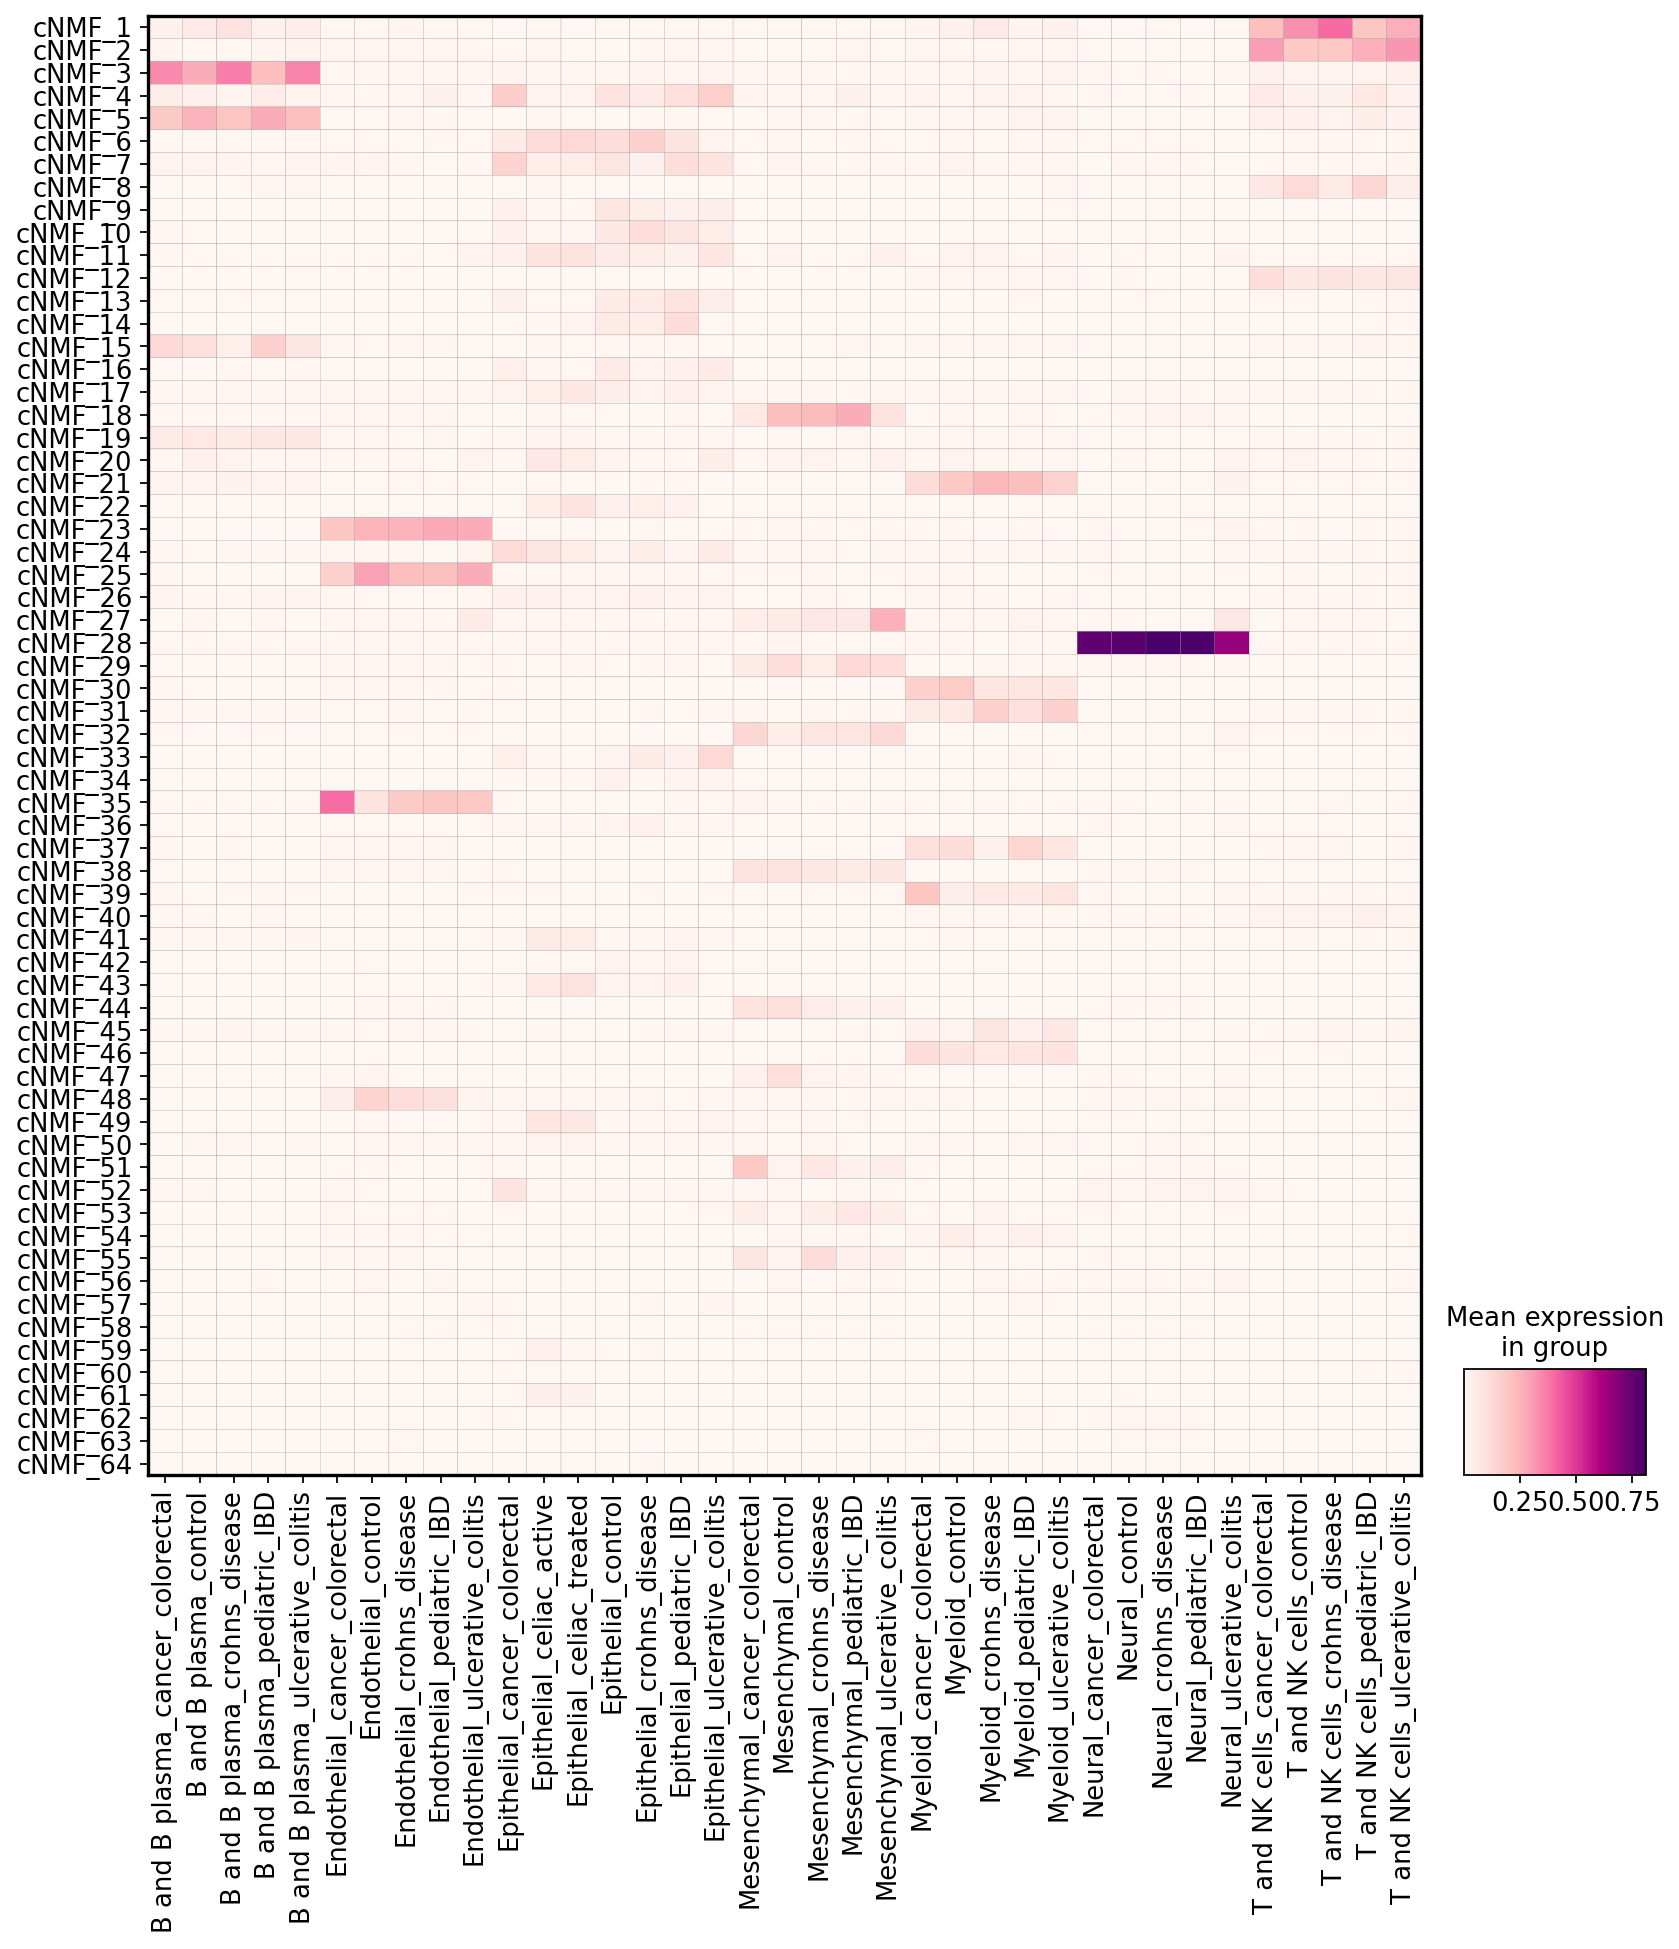

In [17]:
# Heatmap of cNMF usage by cell type
sc.set_figure_params(dpi_save=300)
#sc.pl.heatmap(
sc.pl.matrixplot(
    adata_raw,
    var_names=usage.columns,
    groupby='disease_annot',
    dendrogram=False,
    swap_axes=True,
    cmap="RdPu",
    figsize=(12, 12),
    save="_megagut_small_largeintestine_cNMF_usage_byAnnotation_disease.pdf"
)

In [18]:
color_palette={'EC_venous': '#2a4858',
  'Mast': '#826e91',
  'EC_capillary': '#855f9a',
  'DC_cDC1': '#8c543f',
  'Monocyte': '#5baf07',
  'DC_cDC2': '#cfdb65',
  'Basal': '#727271',
  'Treg_IL10': '#e5c510',
  'Crypt_fibroblast_PI16': '#bd7879',
  'Macrophage': '#486626',
  'Vascular_smooth_muscle': '#1E4147',
  'Lamina_propria_fibroblast_ADAMDEC1': '#e95e50',
  'Epithelial_cycling_G2M': '#ff3c4b',
  'Keratinocyte_stratified': '#EDD3E0',
  'Trm/em_CD8': '#256b87',
  'Pericyte': '#437356',
  'Oral_mucosa_fibroblast': '#303267',
  'Macrophage_MMP9': '#a5f002',
  'EC_lymphatic': '#999999',
  'Rectum_fibroblast': '#522e25',
  'Trm_Th17': '#1e093f',
  'DC_migratory': '#e6a519',
  'Epithelial_cycling_S': '#ff8433',
  'Trm_CD4': '#8107ed',
  'NK_CD16': '#0c1e0e',
  'Macrophage_LYVE1': '#8fd9d0',
  'Trm_CD8': '#2844c1',
  'Macrophage_TREM2': '#42c7ac',
  'Keratinocyte_inflammatory': '#E0AC9D',
  'Tnaive/cm_CD4': '#9c53bc',
  'DC_pDC': '#bdb197',
  'Villus_fibroblast_F3': '#d64582',
  'EC_arterial_2': '#ca6092',
  'EC_arterial_1': '#fa6e6e',
  'gdT': '#3fafb5',
  'B_memory': '#a33c22',
  'T/NK_cycling': '#c260ff',
  'Immune_recruiting_pericyte': '#AAC789',
  'MAIT': '#21b796',
  'ILC3': '#778c00',
  'Melanocyte': '#886F61',
  'Tfh_naive': '#5e3c55',
  'Keratinocyte_outer': '#BF7A9C',
  'EC_cycling': '#fac06e',
  'Tnaive/cm_CD8': '#5ca4ce',
  'NK_CD56bright': '#3f8c08',
  'B_naive': '#9b0319',
  'B_preB': '#8a4682',
  'Treg': '#f98261',
  'B_proB': '#d34794',
  'B_plasmablast': '#9e53db',
  'B_plasma_IgG': '#632f17',
  'Megakaryocyte/platelet': '#c730aa',
  'TA': '#b85f1c',
  'Mono/neutrophil_MPO': '#2a497a',
  'B_plasma_IgA1': '#f76c56',
  'Macrophage_CD5L': '#caf9cf',
  'Tfh': '#5e0b30',
  'Oesophagus_fibroblast': '#63A0C0',
  'B_plasma_IgA2': '#d6558d',
  'gdT_naive': '#26daf2',
  'B_GC_I': '#db9602',
  'B_plasma_IgM': '#c66d31',
  'DC_langerhans': '#c7a642',
  'Fibroblast_reticular': '#f0c134',
  'B_GC_II': '#e2d138',
  'Follicular_DC': '#f0982c',
  'Microfold': '#e55b85',
  'Enterocyte': '#e1b5e6',
  'Epithelial_stem': '#c924b9',
  'Surface_foveolar': '#d9b74a',
  'Mucous_gland_neck': '#f7b37c',
  'Cycling': '#ff8433',
  'Pareital': '#d45f80',
  'Enteroendocrine_MX': '#292663',
  'Myofibroblast': '#CCAE91',
  'Glial_2': '#0D6986',
  'Enteric_neural_crest_cycling': '#DBA507',
  'Enterochromaffin': '#22517a',
  'Chief': '#c95340',
  'Glial/Enteric_neural_crest': '#a8c545',
  'Enteroendocrine_G': '#2f3f4d',
  'Neuroblast': '#c50637',
  'Goblet_progenitor': '#e9f7ad',
  'Goblet': '#6c9939',
  'Enteroendocrine': '#68b7fc',
  'Erythrocytes': '#0e539c',
  'Enteroendocrine_X': '#7292ad',
  'Glial_3': '#053240',
  'Goblet_cycling': '#d1d14f',
  'BEST4_enterocyte_colonocyte': '#39997c',
  'Tuft': '#9d9dff',
  'Paneth': '#79508f',
  'Serous': '#C9DE55',
  'Mucous': '#67cc8e',
  'Duct': '#7D9100',
  'Seromucous': '#ACEBAE',
  'Myoepithelial': '#572300',
  'Ionocytes': '#9d9dff',
  'Colonocyte': '#d66245',
  'Mature_colonocyte': '#fa6161',
  'Mesoderm_2': '#b4793b',
  'Branch_A_inhibtory_motor_neuron': '#a39bcb',
  'SMC_PPLP2': '#d4d4e8',
  'Cycling_fibroblast': '#d65151',
  'ICC': '#69479b',
  'Branch_B_excitatory_motor_neuron': '#496695',
  'SMC_CAPN3': '#968dc6',
  'Mesoderm_1': '#663818',
  'Branch_B_primary_afferent_neuron': '#909134',
  'Proximal_progenitor_DUO/JEJ': '#fac219',
  'SMC_CAPN3_cycling': '#76738e',
  'Glial_1': '#8EC7D2',
  'Branch_A_primary_afferent_neuron': '#27bdbf',
  'Branch_A_interneuron': '#67608a',
  'NTS': '#baada4',
  'Proximal_progenitor_ILE': '#8f6e0d',
  'Enteroendocrine_progenitor': '#aeebdf',
  'Mesothelium': '#8F6592',
  'Distal_progenitor': '#dbc697',
  'Angiogenic_pericyte': '#308587',
  'Eosinophil/basophil': '#8b4eba',
  'CLDN10': '#706d65',
  'Distal_progenitor_PRAC1': '#8f8161',
  'Immature_pericyte': '#90c496',
  'Mesenchymal_LTO': '#f7eb59',
  'Gastric_fetal_epithelial': '#a01160',
  'DCS_MUC17_cycling': '#99216b',
  'DCS_MUC17': '#9c6b73',
  'Gland_basal': '#404040',
  'Gland_fetal': '#168039',
  'Basal_cycling': '#d1bf82',
  'Keratinocyte_fetal': '#d8306e',
  'Gland_duct': '#7D9100',
  'Gland_mucous': '#67cc8e',
  'Myoblast/myocyte': '#e2798d',
  'Unknown': '#000000'
}

In [19]:
epi = adata_raw[adata_raw.obs.level_1_annot.isin(['Epithelial'])]
mye = adata_raw[adata_raw.obs.level_1_annot.isin(['Myeloid'])]
mes = adata_raw[adata_raw.obs.level_1_annot.isin(['Mesenchymal'])]

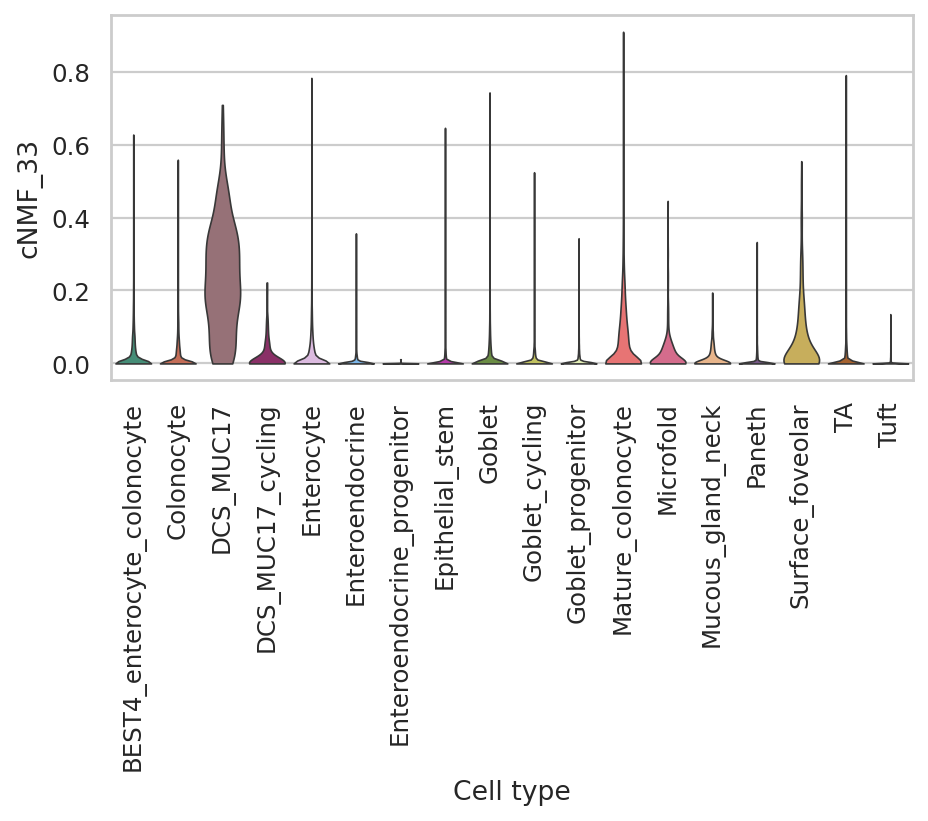

In [20]:
rcParams['figure.figsize'] = 6,3
seaborn.set(style='whitegrid')
sc.pl.violin(
        epi,
        keys=['cNMF_33'],
        groupby='level_3_annot',
        xlabel='Cell type',
        rotation=90,
        linewidth=0.75,
        stripplot=False,
        palette=color_palette,
        save='epi_cNMF_33_violin.pdf'
    )

In [21]:
df = pd.read_csv("/lustre/scratch126/cellgen/team205/sk29/megagut/cNMF_rebuttal/results/cNMF_k64_spectra.csv")
df = df.sort_values('33', ascending=False)
df.reset_index(drop=True, inplace=True)

In [22]:
replacement_dict = {
    value: value if value in ["DUOX2",
"DUOXA2",
"CEACAM6",
"LCN2",
"PDZK1IP1",
"NOS2",
"PI3",
"SAA1",
"CEACAM5",
"SAA2"] else "Other"
    for value in df["Unnamed: 0"].unique()
}

# Replace the values in column '1'
df["Unnamed: 0"] = df["Unnamed: 0"].replace(replacement_dict)

In [23]:
df["Unnamed: 0"][0:10].to_list()

['DUOX2',
 'DUOXA2',
 'CEACAM6',
 'LCN2',
 'PDZK1IP1',
 'NOS2',
 'PI3',
 'SAA1',
 'CEACAM5',
 'SAA2']

In [24]:
df.columns = ['Gene', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35',
       '36', '37', '38', '39', '40', '41', '42', '43', '44','45','46','47','48',
              '49','50','51','52','53','54','55','56','57','58','59','60','61',
             '62','63','64']

In [25]:
df = df.dropna()

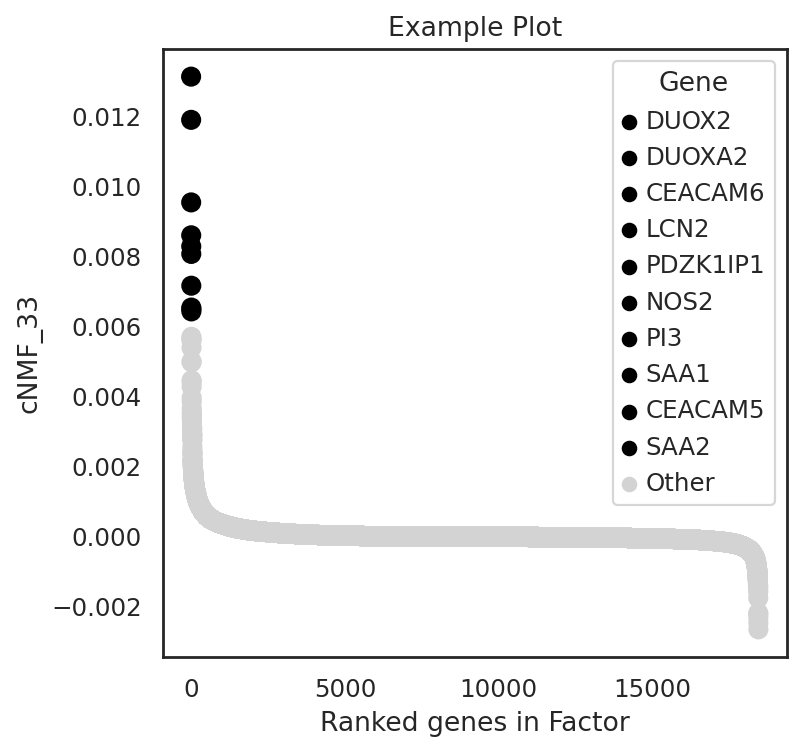

In [26]:
colors = {"DUOX2":'#000000',
"DUOXA2":'#000000',
"CEACAM6":'#000000',
"LCN2":'#000000',
"PDZK1IP1":'#000000',
"NOS2":'#000000',
"PI3":'#000000',
"SAA1":'#000000',
"CEACAM5":'#000000',
"SAA2":'#000000', 'Other':'#D3D3D3',}

rcParams['figure.figsize'] = 5,5
seaborn.set(style='white')
ax = seaborn.scatterplot(x=df.index, y="33", data=df, palette=colors, hue=df["Gene"], s=70, edgecolor=None)
plt.title('Example Plot')
# Set x-axis label
plt.xlabel('Ranked genes in Factor')
# Set y-axis label
plt.ylabel('cNMF_33')
plt.savefig("/nfs/team205/ao15/Megagut/Annotations_v3/disease_analysis/figures/rebuttalFactor_33.pdf",  bbox_inches='tight')

/home/jovyan/my-conda-envs/standard_plotting/lib/python3.8/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/jovyan/my-conda-envs/standard_plotting/lib/python3.8/contextlib.py:120: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  next(self.gen)


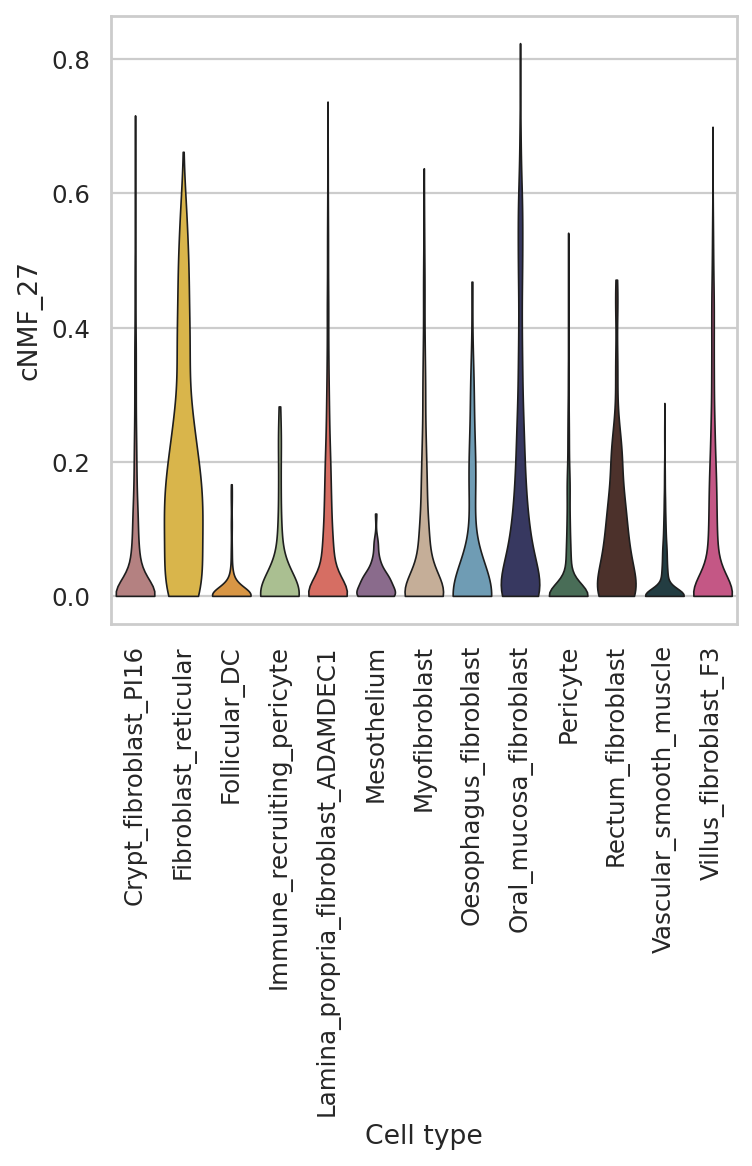

In [27]:
seaborn.set(style='whitegrid')
sc.pl.violin(
        mes,
        keys=['cNMF_27'],
        groupby='level_3_annot',
        xlabel='Cell type',
        rotation=90,
        linewidth=0.75,palette=color_palette,
        stripplot=False,save='mes_cNMF_27_violin.pdf'
    )

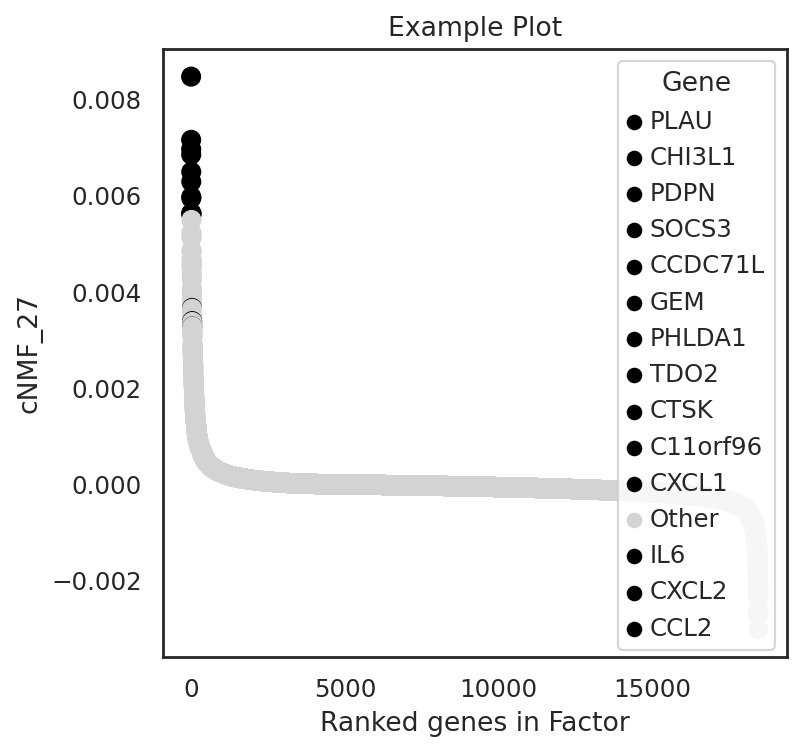

In [28]:
df = pd.read_csv("/lustre/scratch126/cellgen/team205/sk29/megagut/cNMF_rebuttal/results/cNMF_k64_spectra.csv")
df = df.sort_values('27', ascending=False)
df.reset_index(drop=True, inplace=True)

replacement_dict = {
    value: value if value in ["PLAU",
"CHI3L1",
"PDPN",
"SOCS3",
"CCDC71L",
"GEM",
"PHLDA1",
"TDO2",
"CTSK",
"C11orf96",
"CXCL1","CXCL2","CCL2","IL6"] else "Other"
    for value in df["Unnamed: 0"].unique()
}

# Replace the values in column '1'
df["Unnamed: 0"] = df["Unnamed: 0"].replace(replacement_dict)
df["Unnamed: 0"][0:10].to_list()
df.columns = ['Gene', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35',
       '36', '37', '38', '39', '40', '41', '42', '43', '44','45','46','47','48',
              '49','50','51','52','53','54','55','56','57','58','59','60','61',
             '62','63','64']
df = df.dropna()

colors = { "PLAU":'#000000',
"CHI3L1":'#000000',
"PDPN":'#000000',
"SOCS3":'#000000',
"CCDC71L":'#000000',
"GEM":'#000000',
"PHLDA1":'#000000',
"TDO2":'#000000',
"CTSK":'#000000',
"C11orf96":'#000000',
"CXCL1":'#000000',"CXCL2":'#000000',"CCL2":'#000000',"IL6":'#000000','Other':'#D3D3D3',}

rcParams['figure.figsize'] = 5,5
seaborn.set(style='white')
ax = seaborn.scatterplot(x=df.index, y="27", data=df, palette=colors, hue=df["Gene"], s=70, edgecolor=None)
plt.title('Example Plot')
# Set x-axis label
plt.xlabel('Ranked genes in Factor')
# Set y-axis label
plt.ylabel('cNMF_27')
plt.savefig("/nfs/team205/ao15/Megagut/Annotations_v3/disease_analysis/figures/rebuttalFactor_27.pdf",  bbox_inches='tight')

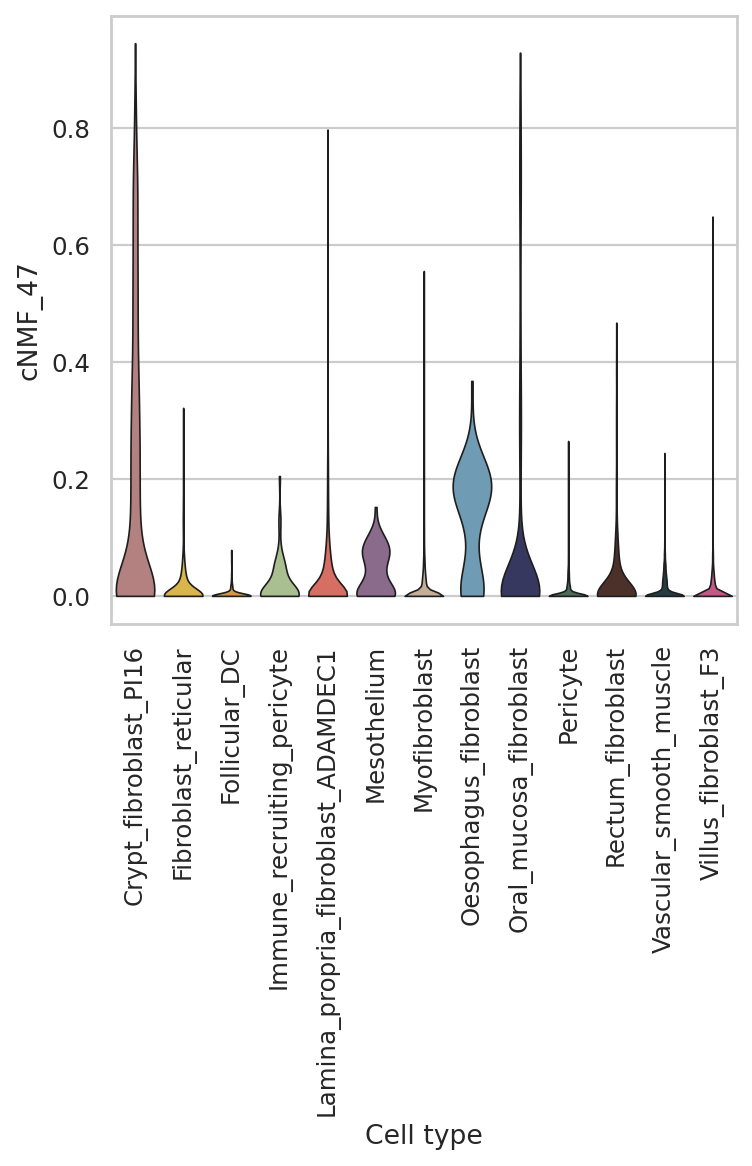

In [29]:
seaborn.set(style='whitegrid')
sc.pl.violin(
        mes,
        keys=['cNMF_47'],
        groupby='level_3_annot',
        xlabel='Cell type',
        rotation=90,
        linewidth=0.75,palette=color_palette,
        stripplot=False,save='mes_cNMF_47_violin.pdf'
    )

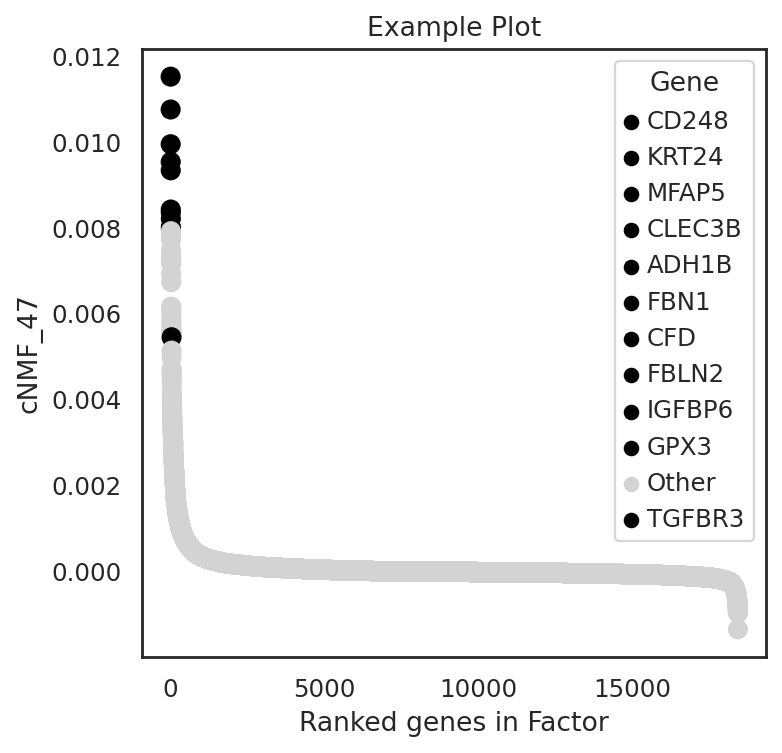

In [30]:
df = pd.read_csv("/lustre/scratch126/cellgen/team205/sk29/megagut/cNMF_rebuttal/results/cNMF_k64_spectra.csv")
df = df.sort_values('47', ascending=False)
df.reset_index(drop=True, inplace=True)

replacement_dict = {
    value: value if value in ["CD248",
"KRT24",
"MFAP5",
"CLEC3B",
"ADH1B",
"FBN1",
"CFD",
"FBLN2",
"IGFBP6",
"GPX3","MFAP5","FBN1","FBLN2","TGFBR3"] else "Other"
    for value in df["Unnamed: 0"].unique()
}

# Replace the values in column '1'
df["Unnamed: 0"] = df["Unnamed: 0"].replace(replacement_dict)
df["Unnamed: 0"][0:10].to_list()
df.columns = ['Gene', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35',
       '36', '37', '38', '39', '40', '41', '42', '43', '44','45','46','47','48',
              '49','50','51','52','53','54','55','56','57','58','59','60','61',
             '62','63','64']
df = df.dropna()

colors = {"CD248":'#000000',
"KRT24":'#000000',
"MFAP5":'#000000',
"CLEC3B":'#000000',
"ADH1B":'#000000',
"FBN1":'#000000',
"CFD":'#000000',
"FBLN2":'#000000',
"IGFBP6":'#000000',
"GPX3":'#000000',"MFAP5":'#000000',"FBN1":'#000000',"FBLN2":'#000000',"TGFBR3":'#000000', 'Other':'#D3D3D3',}

rcParams['figure.figsize'] = 5,5
seaborn.set(style='white')
ax = seaborn.scatterplot(x=df.index, y="47", data=df, palette=colors, hue=df["Gene"], s=70, edgecolor=None)
plt.title('Example Plot')
# Set x-axis label
plt.xlabel('Ranked genes in Factor')
# Set y-axis label
plt.ylabel('cNMF_47')
plt.savefig("/nfs/team205/ao15/Megagut/Annotations_v3/disease_analysis/figures/rebuttalFactor_47.pdf",  bbox_inches='tight')

/home/jovyan/my-conda-envs/standard_plotting/lib/python3.8/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/jovyan/my-conda-envs/standard_plotting/lib/python3.8/contextlib.py:120: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  next(self.gen)


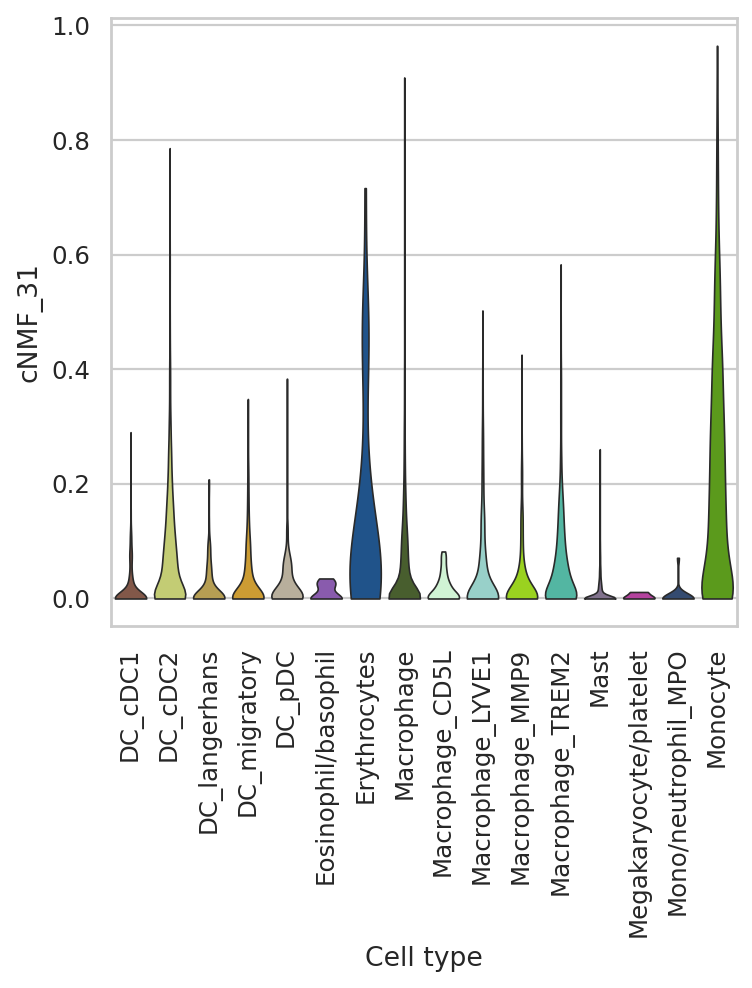

In [31]:
seaborn.set(style='whitegrid')
sc.pl.violin(
        mye,
        keys=['cNMF_31'],
        groupby='level_3_annot',
        xlabel='Cell type',
        rotation=90,
        linewidth=0.75,palette=color_palette,
        stripplot=False,save='mye_cNMF_31_violin.pdf'
    )

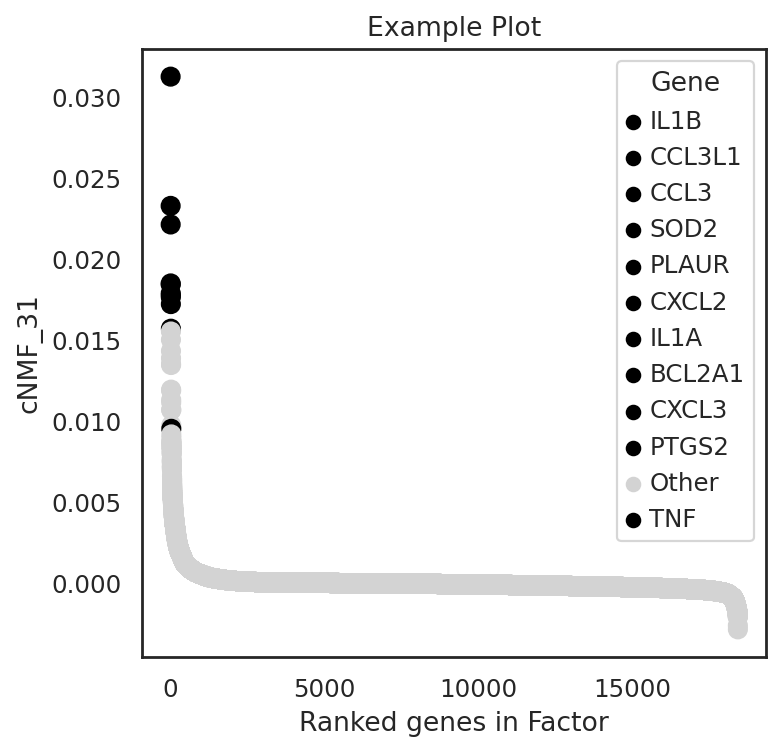

In [32]:
df = pd.read_csv("/lustre/scratch126/cellgen/team205/sk29/megagut/cNMF_rebuttal/results/cNMF_k64_spectra.csv")
df = df.sort_values('31', ascending=False)
df.reset_index(drop=True, inplace=True)

replacement_dict = {
    value: value if value in ["IL1B",
"CCL3L1",
"CCL3",
"SOD2",
"PLAUR",
"CXCL2",
"IL1A",
"BCL2A1",
"CXCL3",
"PTGS2","TNF"] else "Other"
    for value in df["Unnamed: 0"].unique()
}

# Replace the values in column '1'
df["Unnamed: 0"] = df["Unnamed: 0"].replace(replacement_dict)
df["Unnamed: 0"][0:10].to_list()
df.columns = ['Gene', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35',
       '36', '37', '38', '39', '40', '41', '42', '43', '44','45','46','47','48',
              '49','50','51','52','53','54','55','56','57','58','59','60','61',
             '62','63','64']
df = df.dropna()

colors = { "IL1B":'#000000',
"CCL3L1":'#000000',
"CCL3":'#000000',
"SOD2":'#000000',
"PLAUR":'#000000',
"CXCL2":'#000000',
"IL1A":'#000000',
"BCL2A1":'#000000',
"CXCL3":'#000000',
"PTGS2":'#000000',"TNF":'#000000','Other':'#D3D3D3',}

rcParams['figure.figsize'] = 5,5
seaborn.set(style='white')
ax = seaborn.scatterplot(x=df.index, y="31", data=df, palette=colors, hue=df["Gene"], s=70, edgecolor=None)
plt.title('Example Plot')
# Set x-axis label
plt.xlabel('Ranked genes in Factor')
# Set y-axis label
plt.ylabel('cNMF_31')
plt.savefig("/nfs/team205/ao15/Megagut/Annotations_v3/disease_analysis/figures/rebuttalFactor_31.pdf",  bbox_inches='tight')

In [33]:
adata_raw

AnnData object with n_obs × n_vars = 313879 × 18485
    obs: 'latent_cell_probability', 'latent_RT_efficiency', 'cecilia22_predH', 'cecilia22_predH_prob', 'cecilia22_predH_uncertain', 'cecilia22_predL', 'cecilia22_predL_prob', 'cecilia22_predL_uncertain', 'elmentaite21_pred', 'elmentaite21_pred_prob', 'elmentaite21_pred_uncertain', 'suo22_pred', 'suo22_pred_prob', 'suo22_pred_uncertain', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'n_counts_raw', 'log1p_n_counts_raw', 'n_genes_raw', 'log1p_n_genes_raw', 'percent_mito_raw', 'n_counts_mito_raw', 'percent_ribo_raw', 'n_counts_ribo_raw', 'percent_hb_raw', 'n_counts_hb_raw', 'percent_top50_raw', 'n_counts_spliced', 'log1p_n_counts_spliced', 'n_genes_spliced', 'log1p_n_genes_spliced', 'percent_mito_spliced', 'n_counts_mito_spliced', 'percent_ribo_spliced', 'n_counts_ribo_spliced', 'percent_hb_spliced', 'n_counts_hb_sp

In [34]:
adata_raw.obs.age_unified.value_counts()

55-74    66310
35-54    55237
18-34    48621
75+      26808
4-7      17154
9-12     17088
13-17    13433
47-80     5832
Name: age_unified, dtype: int64